## Analyze the shopping trend dataset by answering the questions below.
> **IMPORTANT** write your insights after each question

# Read the data

In [2]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "shopping_trends_updated.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "iamsouravbanerjee/customer-shopping-trends-dataset",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

df.head()

/tmp/ipython-input-1162196871.py:10: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


100%|██████████| 407k/407k [00:00<00:00, 1.85MB/s]


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


### Question 1
What is the distribution of `Purchase Amount (USD)` for different `Subscription Status` values?
- Plot using both **Seaborn’s `boxplot` and Matplotlib’s histogram**.
- Are there any outliers?

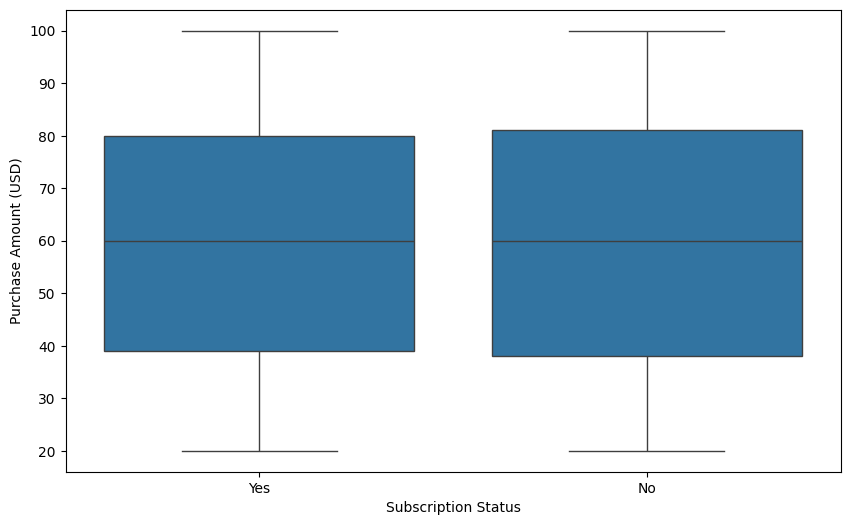

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.boxplot(x='Subscription Status', y='Purchase Amount (USD)', data=df)
plt.show()

In [4]:
dist = df[df['Subscription Status'] == "Yes"]["Purchase Amount (USD)"]

In [5]:
dist1 = df[df['Subscription Status'] == "No"]["Purchase Amount (USD)"]

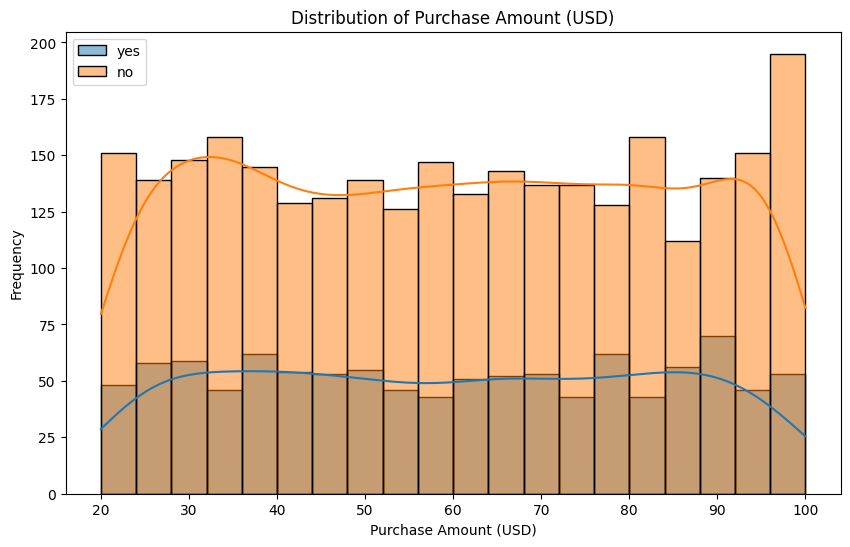

In [6]:
plt.figure(figsize=(10, 6))
sns.histplot(x=dist, bins=20, edgecolor='black', label="yes", alpha = 0.5, kde=True)
sns.histplot(x=dist1, bins=20, edgecolor='black', label="no", alpha = 0.5, kde=True)
plt.legend()

plt.xlabel('Purchase Amount (USD)')
plt.ylabel('Frequency')
plt.title('Distribution of Purchase Amount (USD)')
plt.show()

### Question 2
Compare the frequency of each `Payment Method` across the dataset **from highest to lowest** .
- Use both **Seaborn's `countplot`** and **Matplotlib's bar plot**.

Text(0.5, 0, 'Payment Method')

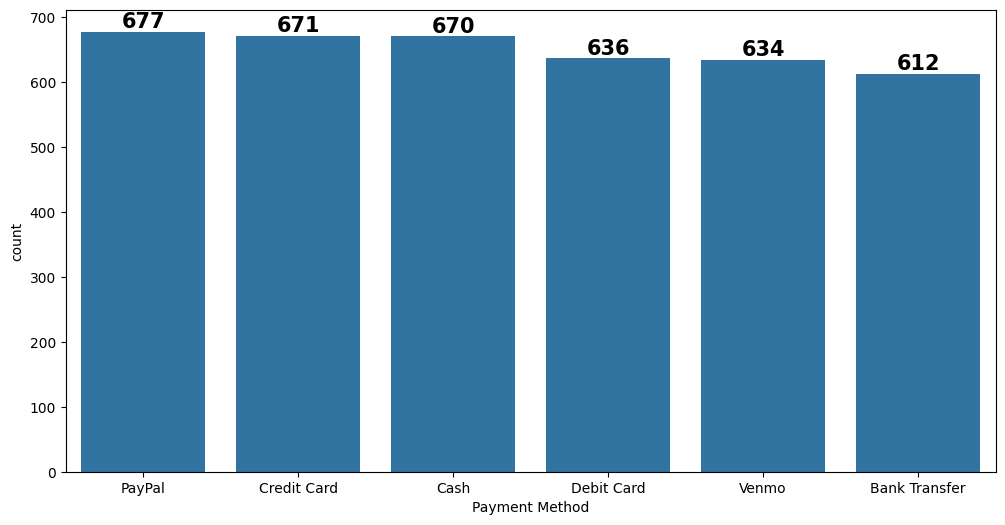

In [7]:
count = df['Payment Method'].value_counts()
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=df, x='Payment Method', order=count.index)
for container in ax.containers:
    ax.bar_label(container, fontweight="black", size=15)
plt.xlabel('Payment Method')

Text(0.5, 0, 'Payment Method')

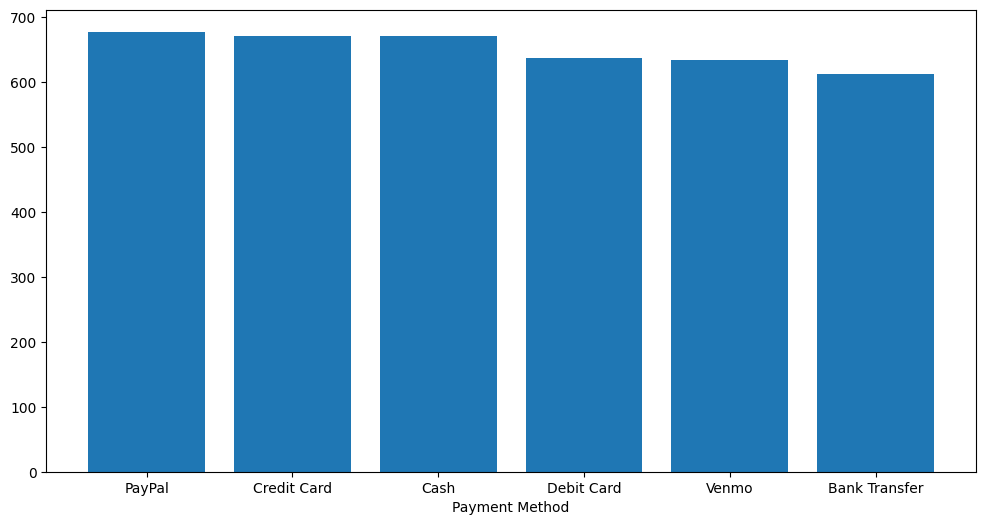

In [8]:
count = df['Payment Method'].value_counts()
plt.figure(figsize=(12, 6))
plt.bar(count.index, count.values)
plt.xlabel('Payment Method')

### Question 3
Show the number of purchases made by each `Gender` in each `Season`.
- Create a **grouped bar chart/ Pie chart using Matplotlib**.
- Also plot a **stacked countplot using Seaborn**.

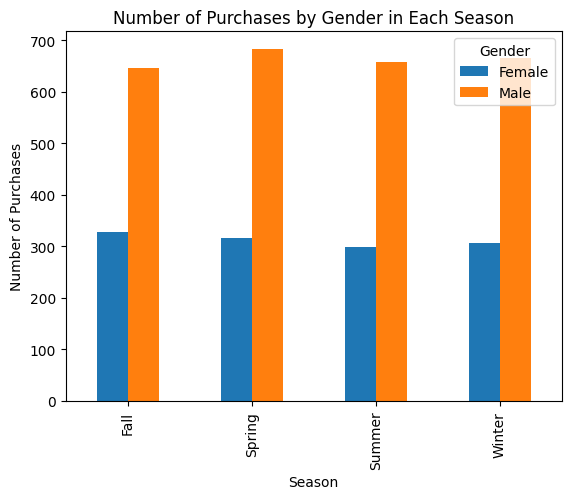

In [9]:
counts = df.groupby(['Season', 'Gender']).size().unstack()
counts.plot(kind='bar')

plt.title('Number of Purchases by Gender in Each Season')
plt.xlabel('Season')
plt.ylabel('Number of Purchases')
plt.legend(title='Gender')
plt.show()


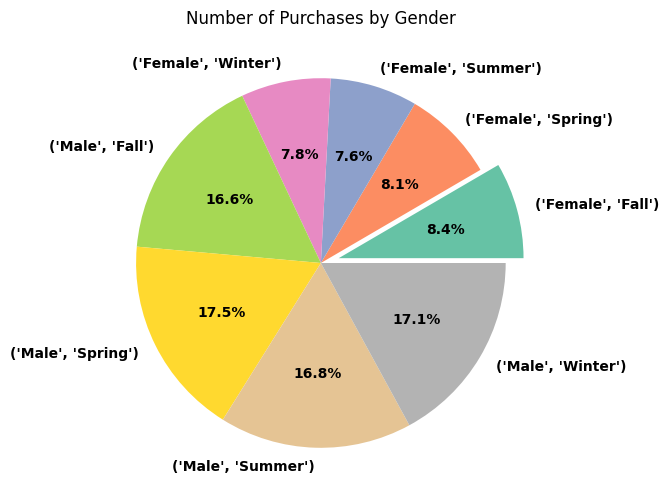

In [10]:
count = df.groupby(['Gender', 'Season']).size()
plt.figure(figsize=(10, 6))
plt.pie(count, labels=count.index, autopct="%1.1f%%",colors=sns.set_palette("Set2"),
        textprops={"fontweight":"black"},explode=[0.1, 0, 0, 0 , 0, 0, 0, 0])
plt.title('Number of Purchases by Gender')
plt.show()

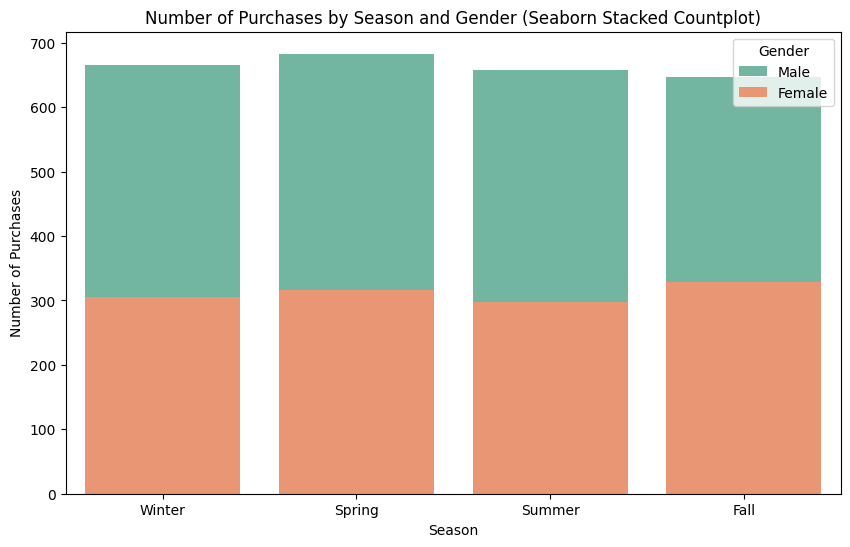

In [11]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Season', hue='Gender', dodge=False)
plt.title('Number of Purchases by Season and Gender (Seaborn Stacked Countplot)')
plt.xlabel('Season')
plt.ylabel('Number of Purchases')
plt.show()

### Question 4
Create a heatmap showing the correlation between all numeric columns.
- Use `sns.heatmap`.
- Interpret the relationship between `Previous Purchases`, `Purchase Amount`, and `Review Rating`.

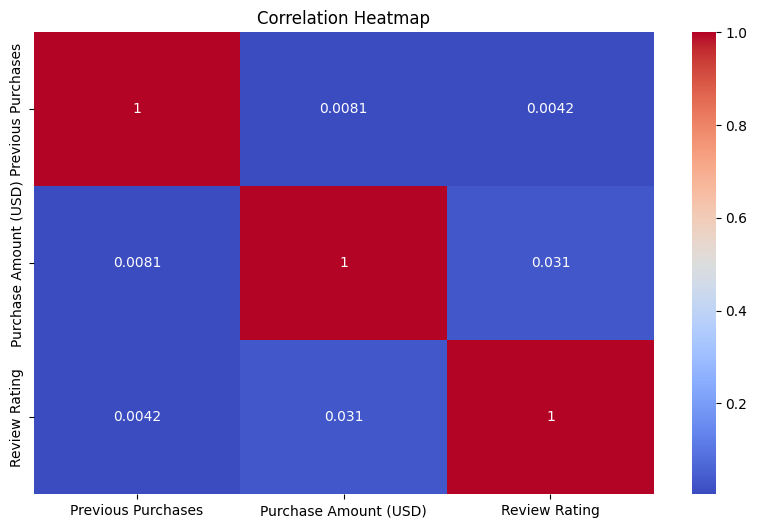

In [12]:
numeric = df[['Previous Purchases', 'Purchase Amount (USD)', 'Review Rating']]
corr = numeric.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### Question 5
Create a scatter plot of `Age` vs `Purchase Amount (USD)`, color-coded by `Gender`.
- Use **Matplotlib and Seaborn side-by-side**.
- Add a trend line in Seaborn using `regplot`.

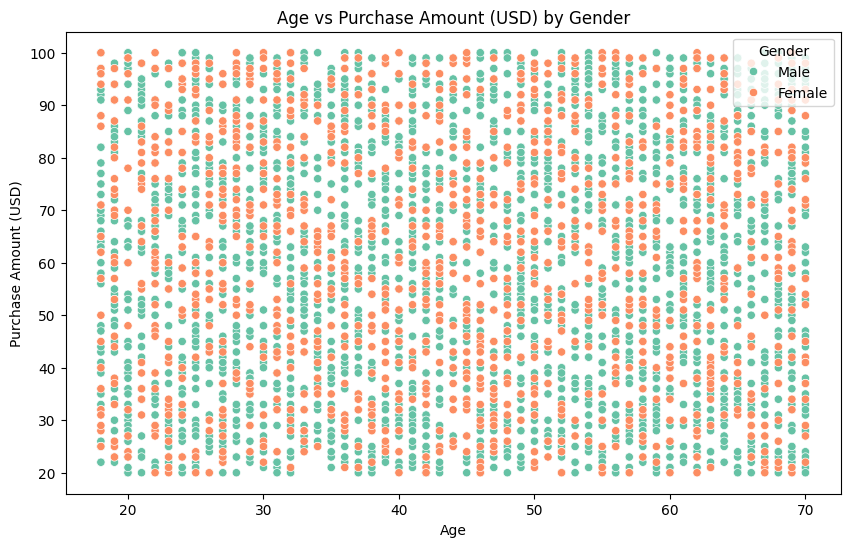

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Purchase Amount (USD)', hue='Gender')
plt.xlabel('Age')
plt.ylabel('Purchase Amount (USD)')
plt.title('Age vs Purchase Amount (USD) by Gender')
plt.legend(loc='upper right', title='Gender')
plt.show()

### Question 6
How does the average review rating differ across different item `Categories` and `Sizes`?
- Use **Seaborn’s heatmap or pivot heatmap** to visualize.
- Use Pandas pivot table to prepare the data.

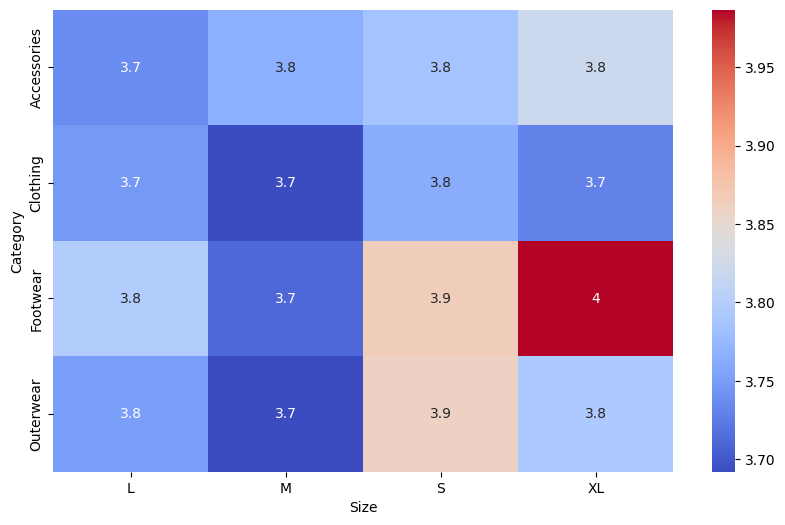

In [14]:
col = df.pivot_table(index='Category', columns='Size', values='Review Rating', aggfunc='mean')
plt.figure(figsize=(10, 6))
sns.heatmap(col, annot=True, cmap='coolwarm')
plt.show()

### Question 7
Which combinations of `Season` and `Shipping Type` lead to the highest average `Purchase Amount (USD)`?
- Show this as a **grouped bar chart** and as a **heatmap**.

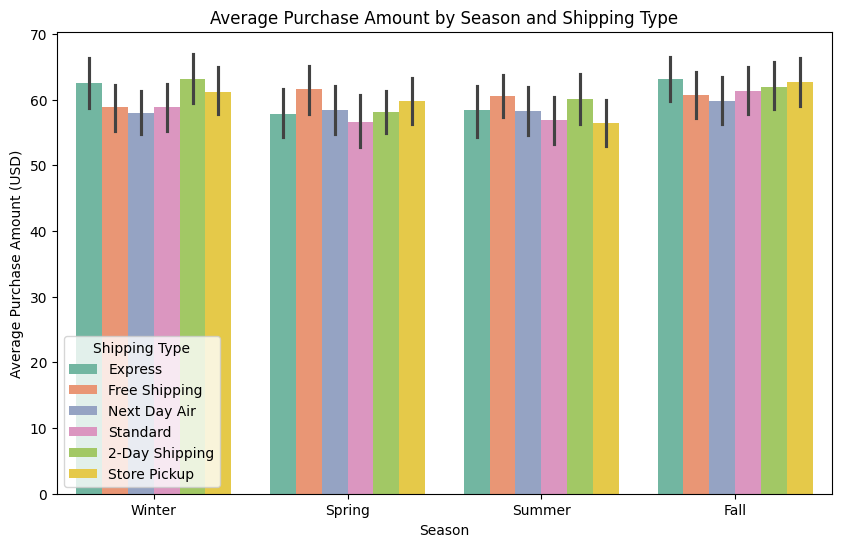

In [15]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df,x='Season',y='Purchase Amount (USD)' ,hue='Shipping Type')
plt.xlabel('Season')
plt.ylabel('Average Purchase Amount (USD)')
plt.title('Average Purchase Amount by Season and Shipping Type')
plt.show()

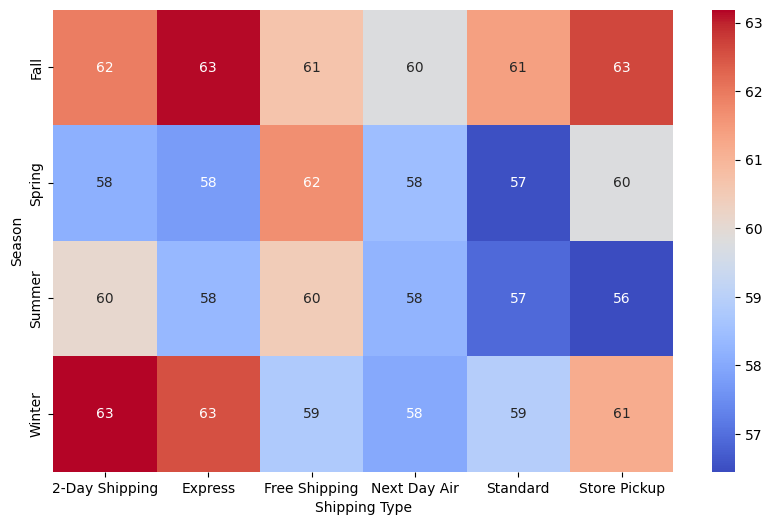

In [16]:
col = df.pivot_table(index = 'Season', columns='Shipping Type', values='Purchase Amount (USD)', aggfunc='mean')
plt.figure(figsize=(10, 6))
sns.heatmap(col, annot=True, cmap='coolwarm')
plt.show()

### Question 8
Plot a violin plot of `Review Rating` by `Gender` for each `Subscription Status`.
- Use `sns.violinplot` with `hue`.

<Axes: xlabel='Gender', ylabel='Review Rating'>

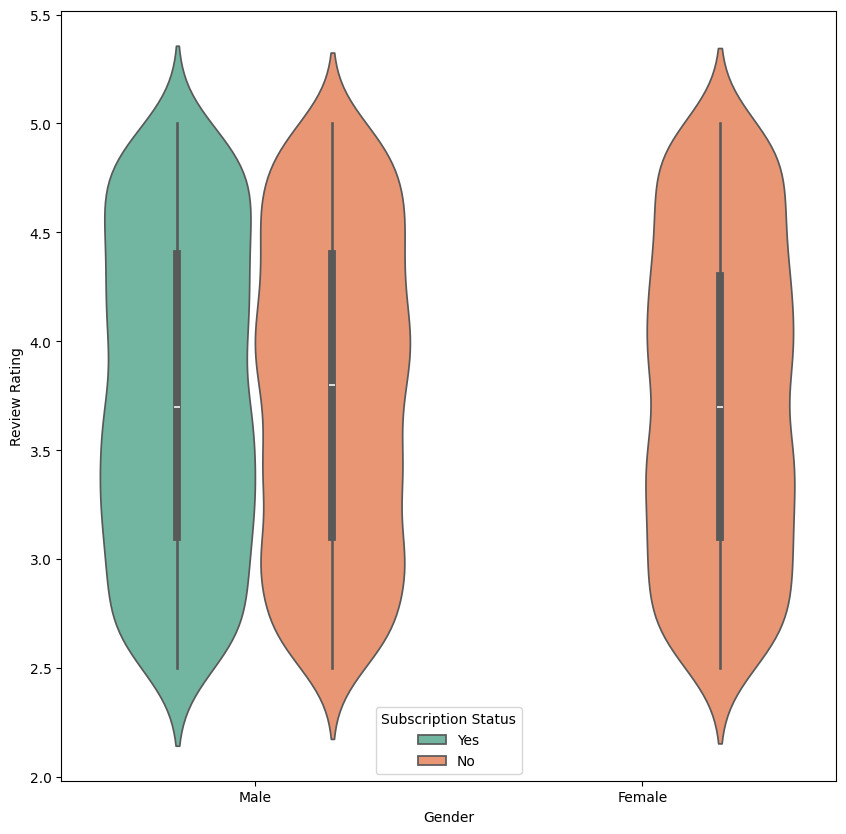

In [17]:
plt.figure(figsize=(10, 10))
sns.violinplot(data=df, x='Gender', y='Review Rating', hue='Subscription Status')

### Question 9
What are the top 5 most purchased `Item Purchased` by total `Purchase Amount`?
- Use Pandas aggregation, plot with **Matplotlib pie and bar** charts.

In [18]:
count = df.groupby('Item Purchased')['Purchase Amount (USD)'].sum()

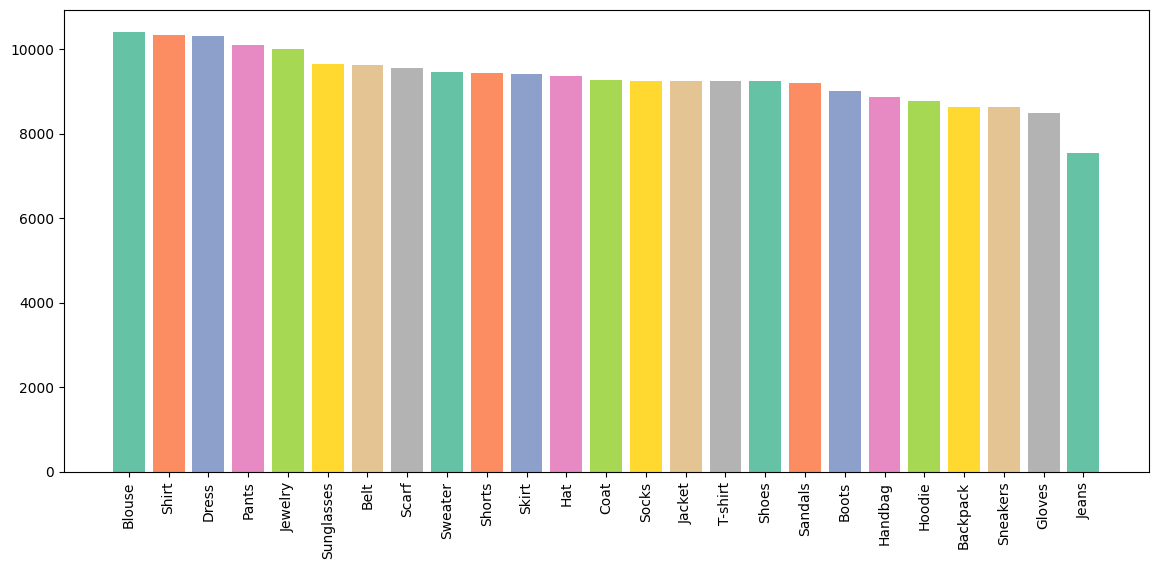

In [19]:
order = count.sort_values(ascending=False).index
plt.figure(figsize=(14,6))
plt.bar(order, count[order], color=sns.color_palette("Set2"))
plt.xticks(rotation = 90)
plt.show()

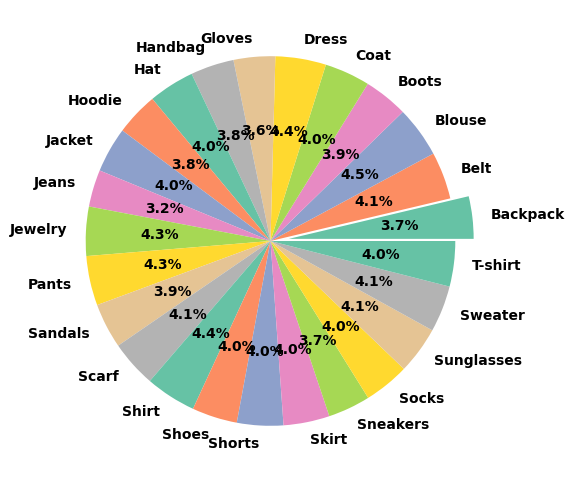

In [20]:
plt.figure(figsize=(14,6))

plt.pie(count.values, labels=count.index, autopct="%1.1f%%",colors=sns.set_palette("Set2"),
        textprops={"fontweight":"black"},explode=[0.1] + [0]*(len(count)-1))
plt.show()

### Question 10
Which `Location` has the highest average `Purchase Amount`, and how does it relate to `Previous Purchases` (plot only top 5 purchase amount location)?
- Use a **Seaborn scatterplot** with size/marker variation.

In [21]:
count = df.groupby('Location')['Purchase Amount (USD)'].mean().head(5)
plt.figure(figsize=(10, 6))
sns.scatterplot(count, hue='Previous Purchases')

ValueError: The following variable cannot be assigned with wide-form data: `hue`

<Figure size 1000x600 with 0 Axes>

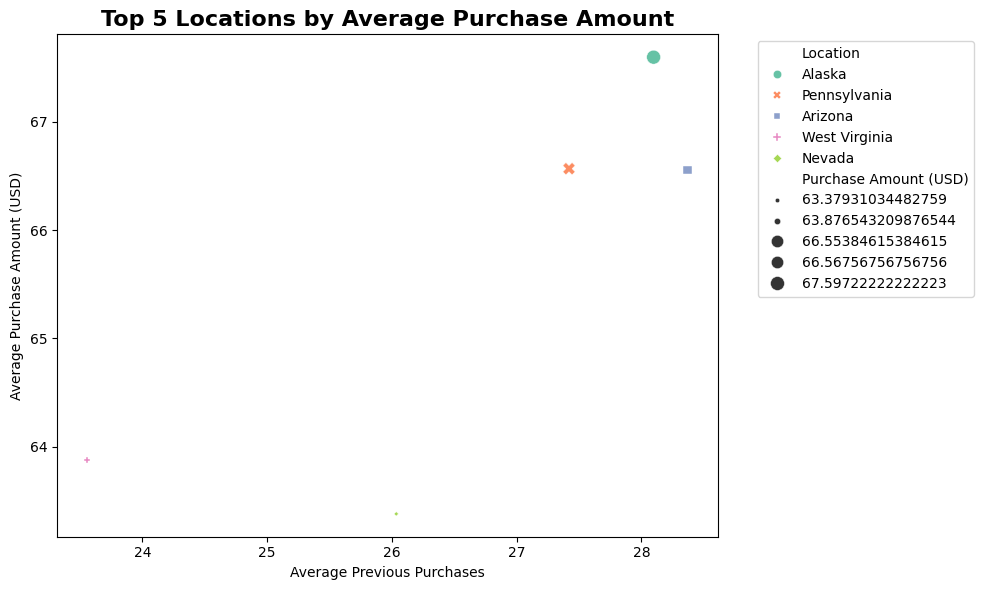

In [34]:
location_avg = df.groupby('Location').agg({
    'Purchase Amount (USD)': 'mean',
    'Previous Purchases': 'mean'
}).reset_index()

# اختيار أعلى 5 Locations
top5 = location_avg.nlargest(5, 'Purchase Amount (USD)')

# رسم Scatter Plot
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=top5,
    x='Previous Purchases',
    y='Purchase Amount (USD)',
    size='Purchase Amount (USD)',
    hue='Location',
    style='Location',
    sizes=(10, 100),
)

plt.title('Top 5 Locations by Average Purchase Amount', fontsize=16, fontweight='bold')
plt.xlabel('Average Previous Purchases')
plt.ylabel('Average Purchase Amount (USD)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.tight_layout()
plt.show()


### Question 11
Using a crosstab, find how `Gender` and `Size` interact.
- Plot using `sns.heatmap`.

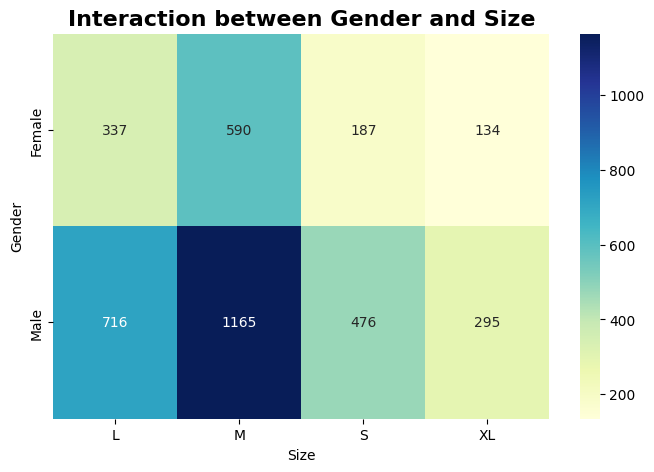

In [36]:
gender_size_ct = pd.crosstab(df['Gender'], df['Size'])

plt.figure(figsize=(8,5))
sns.heatmap(
    gender_size_ct,
    annot=True,
    fmt='d',
    cmap='YlGnBu'
    )

plt.title('Interaction between Gender and Size', fontsize=16, fontweight='bold')
plt.ylabel('Gender')
plt.xlabel('Size')
plt.show()


### Question 12
How does the frequency of purchases column influence the use of promo codes?
- Create a **stacked bar chart** using Matplotlib and compare with a **Seaborn countplot**.

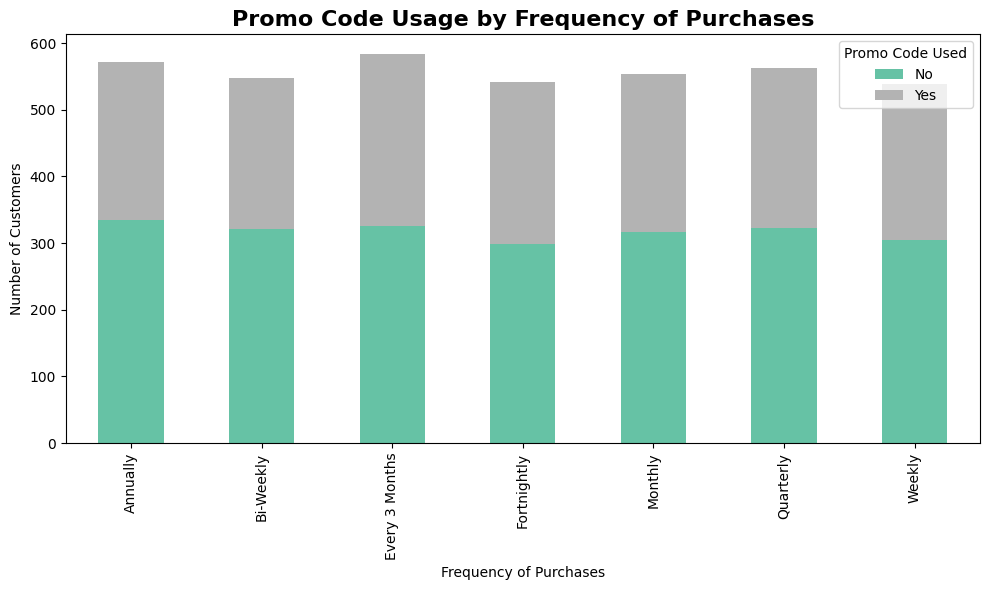

In [37]:
freq_promo = pd.crosstab(df['Frequency of Purchases'], df['Promo Code Used'])

freq_promo.plot(kind='bar', stacked=True, figsize=(10,6), colormap='Set2')

plt.title('Promo Code Usage by Frequency of Purchases', fontsize=16, fontweight='bold')
plt.xlabel('Frequency of Purchases')
plt.ylabel('Number of Customers')
plt.legend(title='Promo Code Used')
plt.tight_layout()
plt.show()

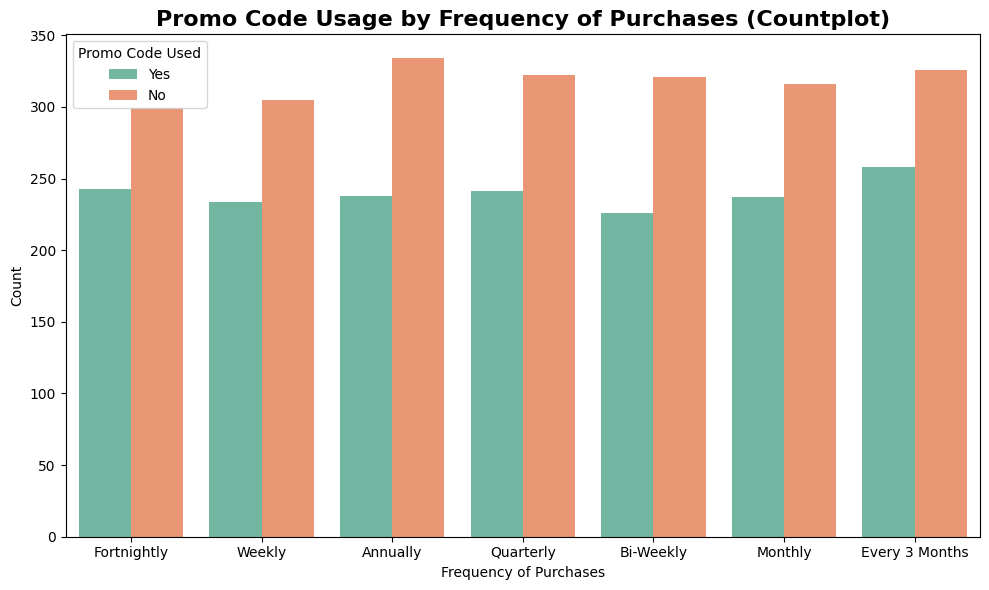

In [38]:
plt.figure(figsize=(10,6))
sns.countplot(
    data=df,
    x='Frequency of Purchases',
    hue='Promo Code Used',
    palette='Set2'
)

plt.title('Promo Code Usage by Frequency of Purchases (Countplot)', fontsize=16, fontweight='bold')
plt.xlabel('Frequency of Purchases')
plt.ylabel('Count')
plt.legend(title='Promo Code Used')
plt.tight_layout()
plt.show()

### Question 13
Using a pairplot, show pairwise relationships between numeric columns segmented by `Gender`.
- Use `sns.pairplot` with `hue="Gender"`.

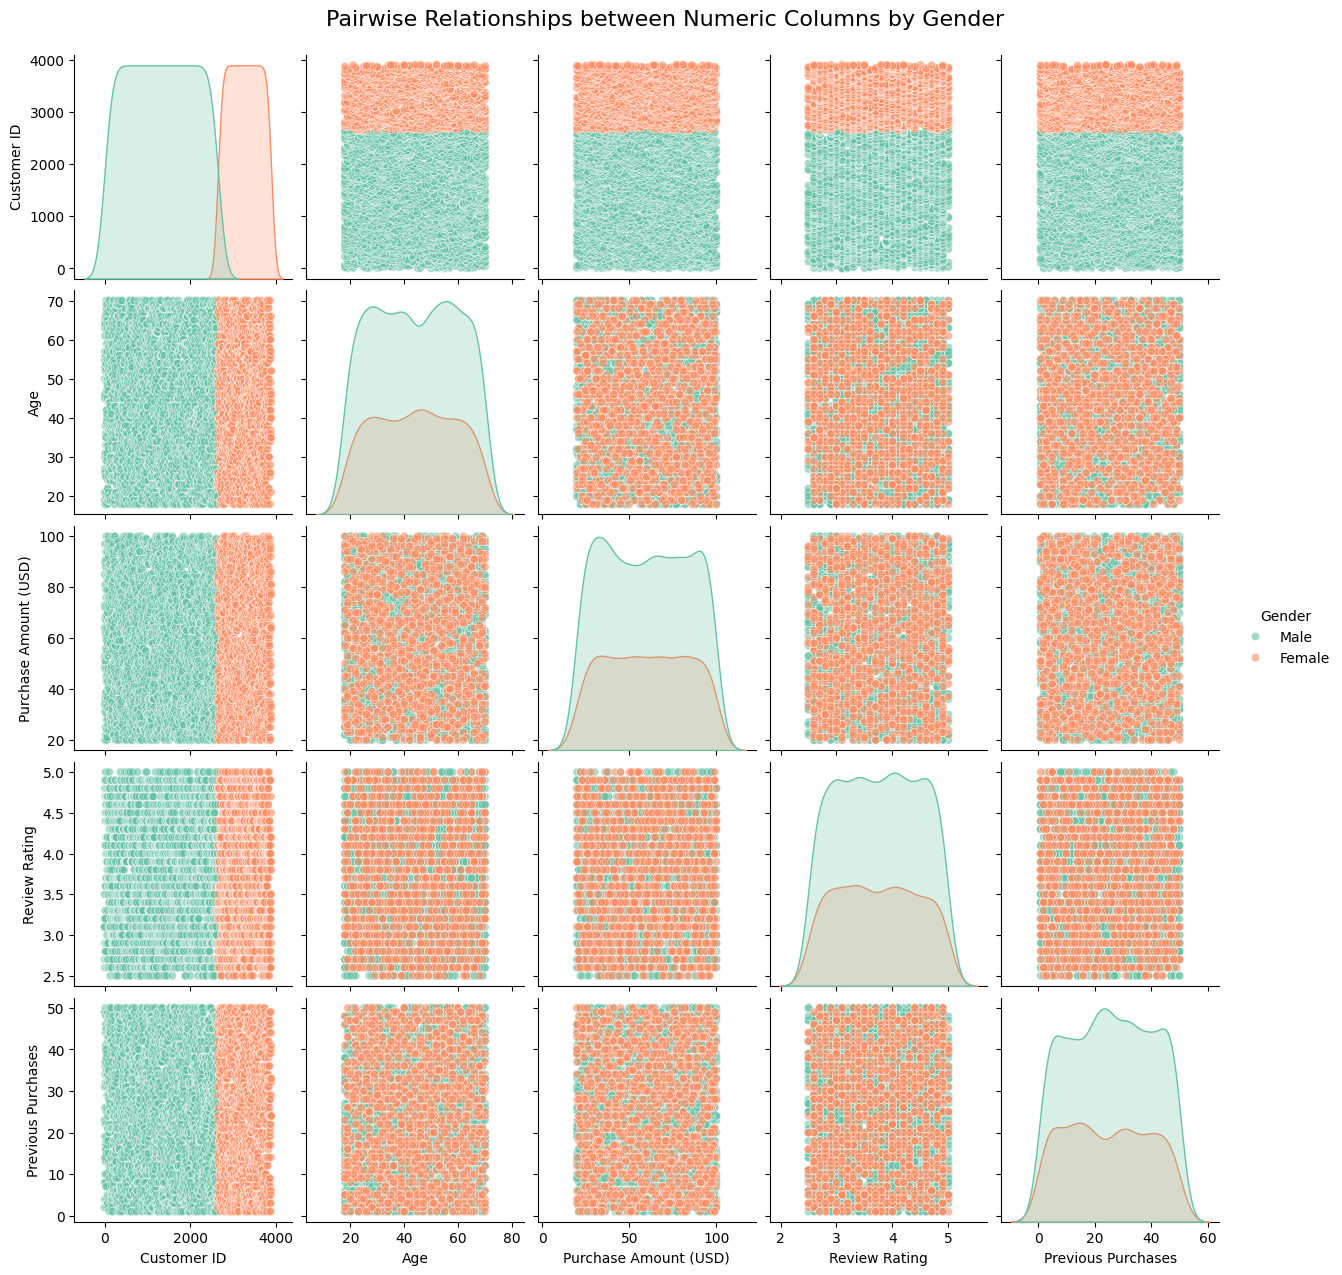

In [45]:
numeric_cols = df.select_dtypes(include=['int64', 'float64'])

numeric_cols['Gender'] = df['Gender']

sns.pairplot(
    data=numeric_cols,
    hue='Gender',
    palette='Set2',
    diag_kind='kde',
    plot_kws={'alpha':0.6}
  )

plt.suptitle('Pairwise Relationships between Numeric Columns by Gender', fontsize=16, y=1.02)
plt.show()
